In [1]:
import pandas as pd
from scipy import stats
import scipy.stats as sts
from scipy.stats import kstest, ks_2samp, shapiro, ttest_1samp, ttest_ind, ttest_ind_from_stats, levene
from statsmodels.stats.diagnostic import lilliefors
import numpy as np
from numpy.random import seed, lognormal, randn, poisson
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [2]:
# Создадим датафрейм с данными о росте, весе и скоре игроков
df = pd.DataFrame({'player_number': [10, 8, 12, 22, 36, 7, 1, 20, 9, 4, 14],
 'height': [168, 176, 178, 191, 185, 183, 185, 179, 169, 183, 167],
 'weight': [76, 77, 79, 81, 82, 79, 74, 84, 73, 71, 68],
 'score': [95, 86, 94, 96, 95, 95, 89, 83, 99, 78, 82]})

In [3]:
df

,player_number,height,weight,score
0,10,168,76,95
1,8,176,77,86
2,12,178,79,94
3,22,191,81,96
4,36,185,82,95
5,7,183,79,95
6,1,185,74,89
7,20,179,84,83
8,9,169,73,99
9,4,183,71,78


In [4]:
df['height'].mean()

178.54545454545453

In [5]:
df['height'].median()

179.0

In [6]:
df['height'].mode()

0    183
1    185
Name: height, dtype: int64

In [7]:
df.mean()

player_number     13.000000
height           178.545455
weight            76.727273
score             90.181818
dtype: float64

In [8]:
df.median()

player_number     10.0
height           179.0
weight            77.0
score             94.0
dtype: float64

In [9]:
df.mode()

,player_number,height,weight,score
0,1,183.0,79.0,95.0
1,4,185.0,NaN,NaN
2,7,NaN,NaN,NaN
3,8,NaN,NaN,NaN
4,9,NaN,NaN,NaN
5,10,NaN,NaN,NaN
6,12,NaN,NaN,NaN
7,14,NaN,NaN,NaN
8,20,NaN,NaN,NaN
9,22,NaN,NaN,NaN


In [10]:
np.mean(df['height'])

178.54545454545453

In [11]:
np.median(df['height'])

179.0

In [12]:
stats.mode(df['height'])

ModeResult(mode=183, count=2)

In [13]:
df = pd.DataFrame({'Company': ['Occidental Petroleum',
'Exxon Mobil Corporation', 'Chevron Corporation',
'Ovintiv Inc.', 'Murphy Oil',
'Apache Corp', 'Continental Resources',
'PDC Energy', 'Phillips 99', 'Devon Energy Corp',
'Canadian Natural Resources', 'Cenovus Energy', 'Enbridge', 'Husky Energy',
'Imperial Oil', 'Irving Oil', 'Pembina Pipeline', 'Suncor Energy'],
 'ROE': [7.35, 4.33, 3.37, 8.3, 3.97, 9.88, 9.52, 7.48, 4.76, 8.95, 9.10, 4.21,
6.12, 7.91, 8.49, 8.72, 6.52, 4.75]})

In [14]:
Var = df['ROE'].var(ddof=1)
sd = df['ROE'].std()


In [15]:
Var

4.645660457516339

In [16]:
sd

2.1553794230984806

In [17]:
NIM = pd.Series([7.6, 7.9, 8.3, 7.2, 6.9, 7.9, 7.4, 7.8, 5.9, 7.1, 6.8])
rate = pd.Series([10, 12, 12, 8, 8, 7.5, 7.5, 7.5, 6.5, 7, 7])

In [18]:
corr = stats.pearsonr(NIM, rate)
corr

PearsonRResult(statistic=0.6821733938700639, pvalue=0.02075029601666806)

In [19]:
corr.statistic

0.6821733938700639

In [20]:
df = pd.DataFrame({'NIM': [7.6, 7.9, 8.3, 7.2, 6.9, 7.9, 7.4, 7.8, 5.9, 7.1, 6.8],
 'rate': [10, 12, 12, 8, 8, 7.5, 7.5, 7.5, 6.5, 7, 7],
 'GDP_growth': [2.5, 1.8, 3.1, 1.9, 2.4, 2.8, 1.0, 3.2, 2.1, 2.2, 0.5]})


In [21]:
corr_matrix = df.corr().round(3)
corr_matrix

,NIM,rate,GDP_growth
NIM,1.000,0.682,0.445
rate,0.682,1.000,0.281
GDP_growth,0.445,0.281,1.000


In [22]:
df = pd.DataFrame({'ROE': [7.4, 7.8, 5.9, 7.1, 6.8, 7.6, 7.9, 8.3, 7.2, 6.9, 7.9],
 'COF': [6.3, 4.2, 6.2, 8.1, 8.4, 7.5, 6.5, 7.8, 6.9, 7.1, 7.2],
 'rating': ['AAA', 'BB+', 'BB+', 'AAA', 'BBB-', 'AA', 'AAA', 'AAA', 'BBB-', 'AAA', 'BB+']})

# список квартилей
Q = [0.25, 0.5, 0.75]

In [23]:
df['ROE'].quantile(Q)

0.25    7.00
0.50    7.40
0.75    7.85
Name: ROE, dtype: float64

In [24]:
df.groupby('rating').agg(lambda x: x.quantile(0.25))

,ROE,COF
rating,,
AA,7.60,7.500
AAA,7.10,6.500
BB+,6.85,5.200
BBB-,6.90,7.275


In [25]:
df[df.rating == 'AAA']['COF'].quantile(0.25)

6.5

In [26]:
quantile = [0.25, 0.5]
max(df[df.rating == 'AAA']['COF'].quantile(quantile))

7.1

In [27]:
df.groupby('rating').agg({'COF': lambda x: round(x.quantile(0.53), 3)})

,COF
rating,
AA,7.500
AAA,7.184
BB+,6.260
BBB-,7.695


In [28]:
df['COF'].quantile(0.53)

7.13

/var/folders/9r/8ct5hzls1f13fzpnb590x1s40000gn/T/ipykernel_889/794173607.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bx = plt.boxplot([df['COF'], df['ROE']],


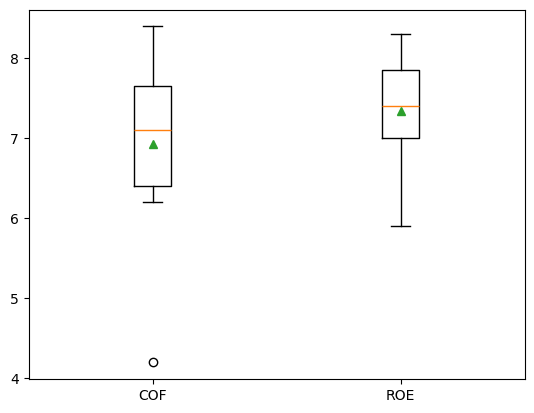

In [29]:
bx = plt.boxplot([df['COF'], df['ROE']], 
                 vert=True,
                 patch_artist=False,
                 showmeans=True,
                 labels=['COF', 'ROE'])

plt.show()

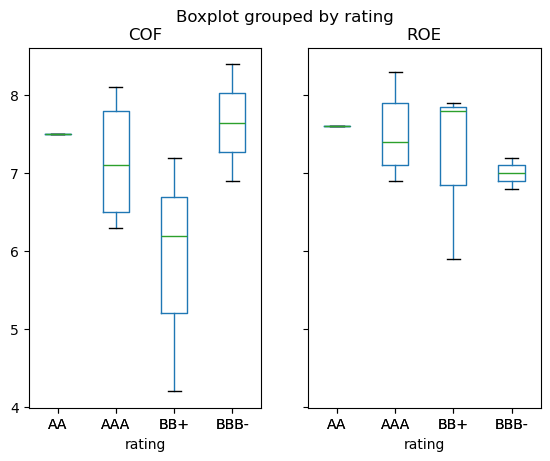

In [30]:
df.boxplot(column=['COF', 'ROE'], by='rating', grid=False)
plt.show()

**Нормальное распределение** - это непрерывное, симметричное и унимодальное распределение, функция плотности вероятности которого задаётся на основе двух параметров (среднего генеральной совокупности μ и стандартного отклонения генеральной совокупности σ):

Свойства нормального распределения:

1. Симметричное

2. Унимодальное 

3. Удовлетворяет правилу трёх сигм, согласно которому в интервале +- 1 сигма (σ) от среднего значения находится 68,27% всех значений распределения, в интервале +- 2 сигмы (σ) - 95,45%, а в интервале +-3 сигмы (σ) - уже 99,73%:

4. Сумма (разность) величин, распределенных нормально, дают величину, также распределенную нормально:

Нормальное распределение - очень распространенный вид распределений на практике благодаря действию центральной предельной теоремы.

**Центральная предельная теорема** (central limit theorem, CLT) говорит о том, что распределение средних значений выборок, состоящих из достаточно большого количества одинаково распределенных случайных величин, будет приближаться к нормальному распределению. Иначе говоря, вне зависимости от того, как изначально распределена наша случайная величина, если мы будем многократно извлекать выборки достаточно большого размера и строить распределение выборочных средних, то окажется, что оно будет стремиться к нормальному.

In [31]:
data = stats.norm(0, 3)
x = np.linspace(-10, 10, 1000)

1. PDF (Probability Density Function - функция плотности вероятности):

Что показывает: Для непрерывной переменной, такой как рост, PDF показывает относительную вероятность того, что рост студента окажется вблизи определенного значения. Важно понимать, что PDF не дает вероятность того, что рост будет точно равен какому-то конкретному значению (для непрерывных переменных эта вероятность всегда равна нулю). Вместо этого, PDF показывает, насколько плотнее сконцентрированы значения роста вокруг данной точки. Там, где кривая PDF выше, значения роста встречаются чаще.

Когда применяется: PDF используется для визуализации распределения непрерывной случайной величины. Например, PDF для роста студентов может показать, что большинство студентов имеют рост около 175 см, и чем дальше от 175 см, тем меньше студентов с таким ростом.

Пример: pdf(175) показывает относительную вероятность того, что рост студента будет около 175 см.

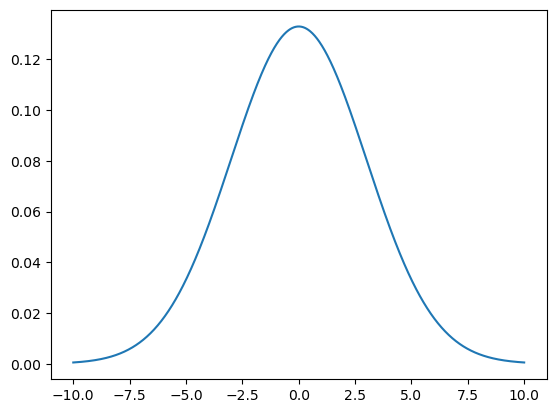

In [32]:
PDF = data.pdf(x)
plt.plot(x, PDF)
plt.show()

2. CDF (Cumulative Distribution Function - функция распределения):

Что показывает: CDF показывает вероятность того, что рост студента будет меньше или равен определенному значению.

Когда применяется: CDF используется для вычисления вероятности попадания случайной величины в определенный интервал.

Пример: cdf(180) показывает вероятность того, что рост студента будет меньше или равен 180 см. Если мы хотим узнать вероятность того, что рост студента будет между 170 и 180 см, мы можем вычислить cdf(180) - cdf(170).

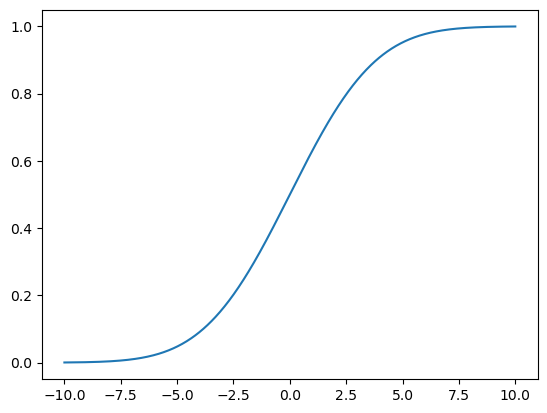

In [33]:
CDF = data.cdf(x)
plt.plot(x, CDF)
plt.show()

3. SF (Survival Function - функция выживания):

Что показывает: SF показывает вероятность того, что рост студента будет больше определенного значения.

Когда применяется: SF часто используется в анализе надежности и выживаемости.

Пример: sf(190) показывает вероятность того, что рост студента будет больше 190 см.

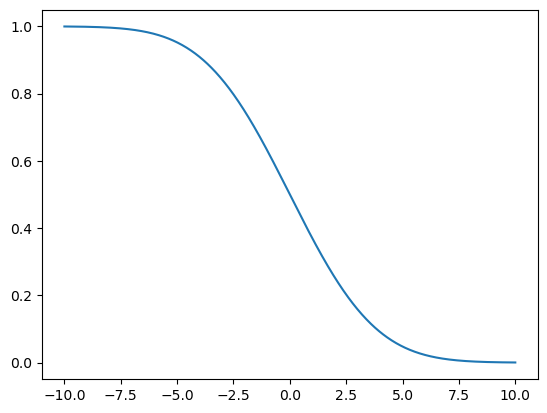

In [34]:
SF = data.sf(x)
plt.plot(x, SF)
plt.show()

4. PPF (Percent Point Function, Quantile function - функция квантилей):

Что показывает: PPF — это обратная функция к CDF. Она отвечает на вопрос: "Какой рост нужно взять, чтобы вероятность того, что рост студента будет меньше или равен этому значению, была равна заданному числу?"

Когда применяется: PPF используется для нахождения квантилей распределения. Например, медиана (50-й процентиль) — это значение, которое делит распределение пополам.

Пример: ppf(0.5) возвращает медиану роста студентов. ppf(0.95) возвращает 95-й процентиль – значение роста, такое, что 95% студентов имеют рост меньше или равен этому значению.

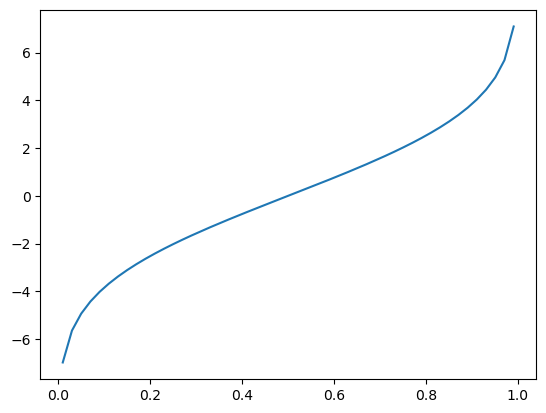

In [35]:
PPF = data.ppf(x)
plt.plot(x, PPF)
plt.show()

5. ISF (Inverse Survival Function - обратная функция выживания):

Что показывает: ISF – это обратная функция к SF. Она отвечает на вопрос: "Какой рост нужно взять, чтобы вероятность того, что рост студента будет больше этого значения, была равна заданному числу?"

Пример: isf(0.1) возвращает значение роста, такое что только 10% студентов имеют рост больше этого значения.

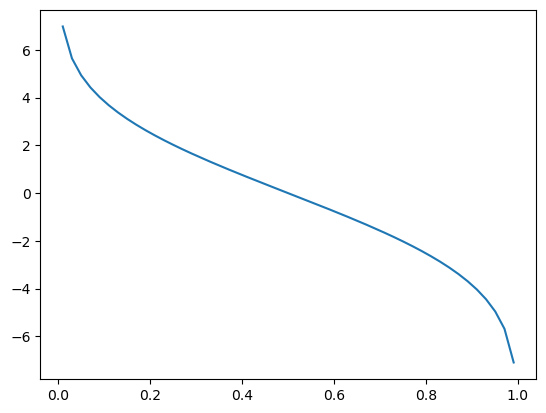

In [36]:
ISF = data.isf(x)
plt.plot(x, ISF)
plt.show()

In [46]:
normal = stats.norm(50, 2)

round(normal.cdf(46), 5)

0.02275

In [47]:
normal = stats.norm(30, 4)

round(normal.sf(34), 5)

0.15866

In [49]:
normal = stats.norm(0, 4.54)

normal.pdf(12.11).round(5)

0.00251

In [ ]:
normal = stats.norm(0, 1.95)

round(normal.cdf(2) - normal.cdf(-1) , 5)

0.54343

In [63]:
normal = stats.norm(7.45, 1.36)

normal.cdf(8.99).round(5)

0.87126

In [64]:
data_z = stats.norm(0, 1)

data_z.ppf(0.05)

-1.6448536269514729

In [67]:
sd = 5.34
p_05 = 48.5

x_mean = - (data_z.ppf(0.05) * sd - p_05)
x_mean

57.28351836792086

In [86]:
mu = 78.97 - 46.65  # Среднее значение
sigma = np.sqrt(8.11**2 + 13.23**2)  # Стандартное отклонение
normal = stats.norm(mu, sigma)

v_0 = normal.sf(0).round(5)

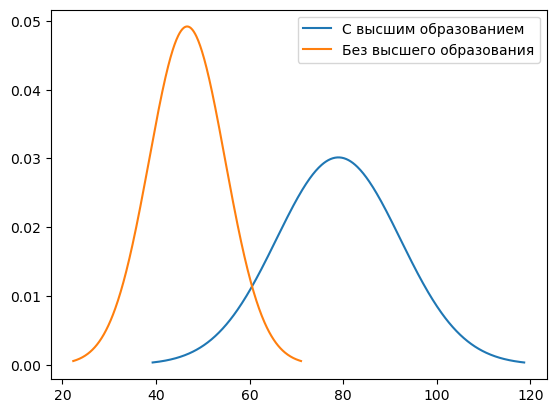

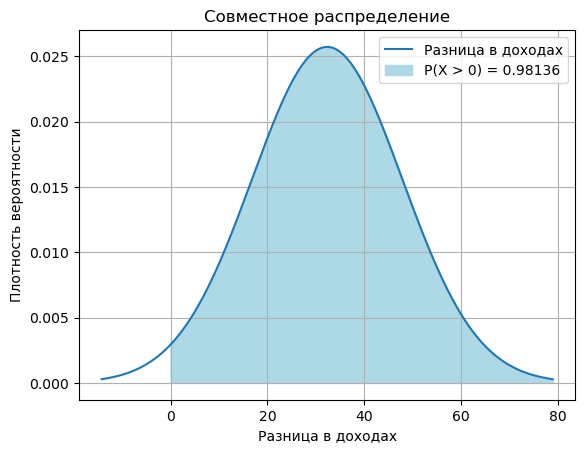

In [98]:
# Параметры распределений
mu1 = 78.97  # Средний доход с высшим образованием
sigma1 = 13.23 
mu2 = 46.65  # Средний доход без высшего образования
sigma2 = 8.11

# Создание распределений
dist1 = stats.norm(mu1, sigma1)
dist2 = stats.norm(mu2, sigma2)

# Диапазон для построения графиков
x_1 = np.linspace(mu1 - 3*sigma1, mu1 + 3*sigma1, 500)
x_2 = np.linspace(mu2 - 3*sigma2, mu2 + 3*sigma2, 500)


# Построение графиков отдельных распределений
plt.plot(x_1, dist1.pdf(x_1), label='С высшим образованием')
plt.plot(x_2, dist2.pdf(x_2), label='Без высшего образования')
plt.legend()

# Расчет параметров совместного распределения
mu_diff = mu1 - mu2
sigma_diff = np.sqrt(sigma1**2 + sigma2**2)
normal = stats.norm(mu_diff, sigma_diff)


# Построение графика совместного распределения
x_diff = np.linspace(mu_diff - 3*sigma_diff, mu_diff + 3*sigma_diff, 500)
plt.figure() # Новая фигура для совместного распределения
plt.plot(x_diff, normal.pdf(x_diff), label='Разница в доходах')


# Заштриховываем область вероятности
x_fill = np.linspace(0, mu_diff + 3*sigma_diff, 500)
plt.fill_between(x_fill, normal.pdf(x_fill), color='lightblue', label=f'P(X > 0) = {normal.sf(0):.5f}')


# Настройки графиков
plt.title('Совместное распределение')
plt.xlabel('Разница в доходах')
plt.ylabel('Плотность вероятности')

plt.legend()
plt.grid(True)
plt.show()

Убедиться, что рассматриваемое нами непрерывное распределение является нормальным, можно проведя различные тесты, например: 

    Тест Колмогорова-Смирнова (Kolmogorov-Smirnov test)
    Тест Колмогорова-Смирнова с поправкой Лиллиефорса (Lilliefors test)
    Тест Шапиро-Уилка (Shapiro-Wilk test)  
    Тест Андерсона-Дарлинга (Anderson-Darling test)
    Тест Крамера-Мизеса (Сramer-von Mises test) 
    Тест на асимметричность и эксцессы (D’Agostino skewness test,  Anscombe-Glynn kurtosis test)
    Тест Харке-Бера (Jarque-Bera test) и др.
Тесты на нормальность сравнивают проверяемую выборку с теоретическим распределением (в нашем случае с нормальным) с такими же значениями среднего и стандартного отклонения. Нулевая гипотеза заключается в том, что выборка имеет нормальное распределение. В случае наличия оснований (например, при p-value < 0.05) считать, что полученные в тесте различия являются статистически значимыми, мы можем отвергнуть нулевую гипотезу о нормальности распределения.

На небольших выборках и на выборках с асимметричным распределением тест Шапиро-Уилка и тест Андерсона-Далринга имеют наибольшую мощность в сравнении с другими тестами. Тест Колмогорова-Смирнова (без поправки Лиллиефорса) дает плохие результаты на малых выборках.

Важно: на практике для решения задач оценки соответствия распределения данных нормальному распределению в большинстве случаев будет достаточно одного из трех тестов: Колмогорова-Смирнова с поправкой Лиллиефорса (для больших выборок с симметричным распределением), Шапиро-Уилка (для небольших выборок с возможной асимметрией) или теста Андерсона-Дарлинга.

**Тест Колмогорова-Смирнова** (Kolmogorov–Smirnov test, K-S) используется для проверки того, соответствует ли выборка определенному распределению, например, нормальному. 

Тест K-S cравнивает эмпирическую функцию распределения (empirical cumulative distribution function, ECDF) с теоретической функцией распределения (theoretical cumulative distribution function, TCDF) со средним значением и стандартным отклонением, которые соответствуют нашей выборке. 

<image src="https://ucarecdn.com/0021a6ad-1426-41ae-95a7-3300a0f8cee5/">

Далее рассчитываются расстояния между функциями ECDF и TCDF в каждой точке и находится супремум (максимальное значение) этих расстояний, на основе которого рассчитываются статистики Колмогорова-Смирнова и принимаются итоговые решения.



Важно: Поскольку в тесте K-S рассчитывается именно супремум расстояний между ECDF и TCDF, то он может быть очень чувствителен к наличию выбросов - это является ограничением K-S теста. Однако поправка Лиллиефорса может сделать K-S тест более консервативным к наличию выбросов. K-S тест с поправкой Лиллиефорса считается более подходящим для больших выборок.

 

Тест Колмогорова-Смирнова может быть применен для сравнения двух разных выборок между собой и ответа на вопрос, являются ли проверяемые выборки однородными, то есть происходящими из одного и того же распределения (двухвыборочный тест Колмогорова-Смирнова).

Тесты Крамера-Мизеса и Андерсона-Дарлинга также сравнивают между собой функции ECDF и TCDF, но помогают проводить более специфицированные тесты, например, хорошо отлавливать разницу в области, близкой к среднему значению распределения (критерий Крамера-Мизеса) или в области хвостов распределения (критерий Андерсона-Дарлинга), в отличие от критерия Колмогорова-Смирнова, который специфицирован для всего диапазона данных.

In [103]:
# инициализируем генератор псевдослучайных чисел
seed(0)

# создаем 1000 значений, имеющих логнормальное распределение со средним значением 0 и стандартным отклонением 2
data = lognormal(0, 2, 1000)

# запускаем одновыборочный тест Колмогорова-Смирнова на соответствие нашего распределения (data) нормальному распределению (norm)
print(kstest(data, 'norm'))

KstestResult(statistic=0.5009017028793219, pvalue=1.35806479802988e-232, statistic_location=0.0022602358570880305, statistic_sign=-1)


In [106]:
# инициализируем генератор псевдослучайных чисел
seed(0)

# создаем 1000 значений, имеющих стандартное нормальное распределение
standard_normal = randn(1000)

# создаем 100 значений, имеющих логнормальное распределение со средним значением 0 и стандартным отклонением 2
log_normal = lognormal(0, 2, 1000)

# запускаем двухвыборочный тест Колмогорова-Смирнова
print(ks_2samp(standard_normal, log_normal))

KstestResult(statistic=0.525, pvalue=2.8513106707793296e-126, statistic_location=0.012231983638817386, statistic_sign=1)


Для проведения теста **Колмогорова-Смирнова с поправкой Лиллиефорса** (Lilliefors test) в Python будем использовать lillifors библиотеки statsmodels. На примере того же логнормального распределения попробуем провести тест Колмогорова-Смирнова с поправкой Лиллиефорса и оценить, достаточно ли у нас оснований, чтобы отвергнуть нулевую гипотезу теста о соответствии нормальному распределению:

In [6]:
# инициализируем генератор псевдослучайных чисел
seed(0)

# создаем 1000 значений, имеющих логнормальное распределение со средним значением 0 и стандартным отклонением 2
data = lognormal(0, 2, 1000)

# запускаем одновыборочный тест Колмогорова-Смирнова c поправкой Лиллиефорса
print(lilliefors(data))

(0.3757620191903032, 0.0009999999999998899)


Поскольку получившееся значение p-value (0.00099999...) < 0.01, мы можем отвергнуть нулевую гипотезу о нормальности данных.

In [9]:
data = pd.read_csv('/Users/mihailevtyugin/Downloads/SP_500_returns.csv', sep=';')
data

,Date,Return_SP_500
0,02.12.2014,0.006384
1,03.12.2014,0.003765
2,04.12.2014,-0.001162
3,05.12.2014,0.001665
4,08.12.2014,-0.007257
...,...,...
1249,18.11.2019,0.000503
1250,19.11.2019,-0.000593
1251,20.11.2019,-0.003756
1252,21.11.2019,-0.001583


In [14]:
data_sp_500 = data.Return_SP_500
kstest(data_sp_500, 'norm')

KstestResult(statistic=0.4868045792704918, pvalue=2.6155164261960836e-274, statistic_location=0.0250830201642707, statistic_sign=1)

**Тест Шапиро-Уилка** основан на корреляции между нашими данными и соответствующими нормально распределенными значениями и обеспечивает более высокую мощность, чем K-S тест даже с учетом поправки Лиллиефорса.

In [17]:
# инициализируем генератор псевдослучайных чисел
seed(0)

# создаем 100 значений, имеющих распределение Пуассона с лямбдой, равной 5
data = poisson(5, 100)

# запускаем тест Шапиро-Уилка на соответствие нашего распределения (data) нормальному распределению
print(shapiro(data))

ShapiroResult(statistic=0.9581912025699156, pvalue=0.0029943533404083633)


Еще одним способом проверить данные на нормальность является визуальный анализ графиков QQ Plot. Это особенно актуально в случаях, когда выборка не слишком большая.

**QQ plot** (Quantile-Quantile Plot) - это графический инструмент, используемый для оценки того, соответствует ли набор данных некоему теоретическому распределению, например, нормальному (normal QQ Plot).

<image src="https://ucarecdn.com/369dd574-2ab0-4ea3-93c1-5519a71eb6a3/">

По горизонтальной оси QQ plot располагаются теоретические квантили стандартного нормального распределения (обычно). Значения -2, -1, 0, 1 и 2 на горизонтальной оси выражены в единицах стандартного отклонения, т.е. в интервале от -1 до 1 находятся почти 68% всех наблюдений, а в интервале от -2 до 2 находятся почти 95%

По вертикальной оси QQ plot располагаются квантили выборочного распределения, которое мы проверяем на соответствие нормальному.

Прямая линия – это линия главного тренда (reference line) для выборочных данных, которая строится в статистических пакетах (например, на основе метода МНК). 

Если рассматриваемое распределение является нормальным, то точки на графике QQ Plot будут располагаться вдоль некоторой прямой (т.е. рассматриваемое распределение и теоретическое нормальное распределение линейно зависимы). Intercept (пересечение с вертикальной осью) и slope (наклон) этой прямой имеют смысл среднего и стандартного отклонения нормального распределения, наилучшим образом подходящего к нашим данным. Эта прямая необязательно будет соответствовать прямой x = y.






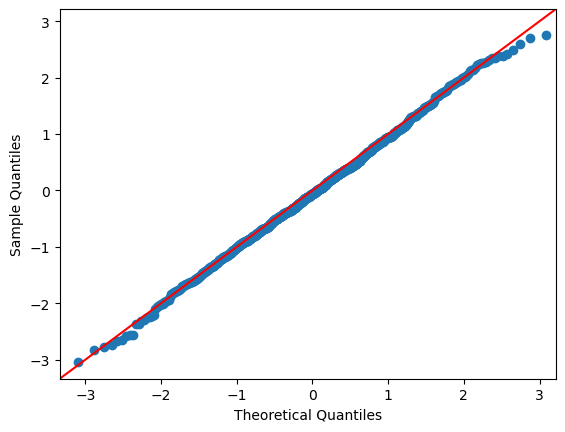

In [20]:
np.random.seed(0)
# Создаем выборку из 1000 значений, имеющих стандартное нормальное распределение
data = randn(1000)

# Строим QQ plot с reference line в виде прямой линии под 45 градусов
fig = sm.qqplot(data, line='45')
plt.show()

Аргумент line = '45' подходит только для z-стандартизированных данных, если у вас любые другие данные, то нужно использовать line = 'q', либо line = '45'  вместе с fit=True.

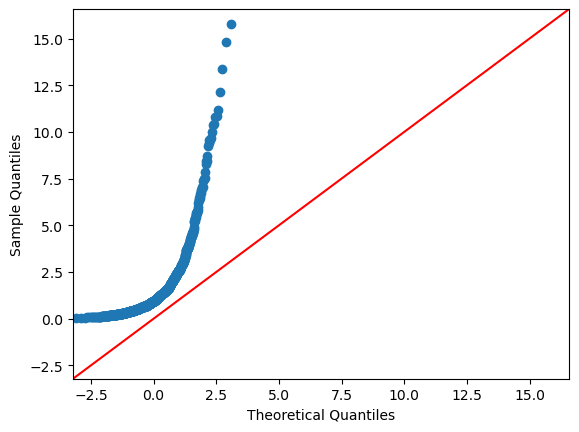

In [21]:
np.random.seed(0)
# Создаем выборку из 1000 значений, имеющих логнормальное распределение
data = lognormal(0, 1, 1000)

# Строим QQ plot с reference line в виде прямой линии под 45 градусов
fig = sm.qqplot(data, line='45')
plt.show()

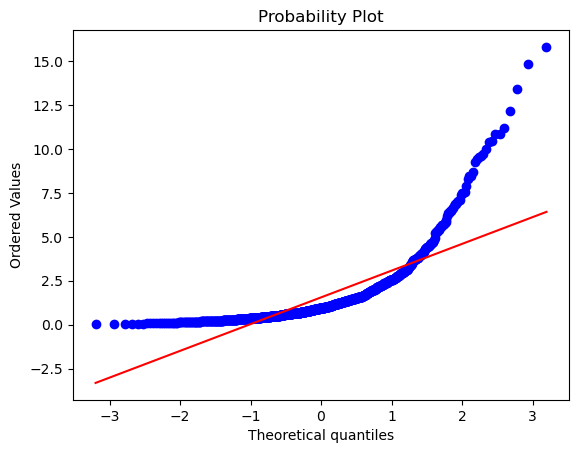

In [30]:
sts.probplot(data, dist="norm", plot=plt)
plt.show()

**Одновыборочный t-тест** предназначен для проверки того, равно ли реальное математическое ожидание генеральной совокупности случайной величины μ (для которой известна лишь выборка с известными средним Mx и стандартным отклонением sd) некоторому заданному значению в предположении, что дисперсия генеральной совокупности σ не известна.

Нулевая гипотеза формулируется как μ=m, т.е. что реальное математическое ожидание генеральной совокупности равно заданному значению m. Альтернативная гипотеза формулируются как μ≠m.

Проводя одновыборочный t-тест, мы хотим проверить, насколько вероятно, что математическое ожидание генеральной совокупности на самом деле равно m, учитывая наши знания о некоторой выборке (Mx, sd).

Проведем одновыборочный t-тест с помощью .ttest_1samp с нулевой гипотезой о том, что μ=9.71:

In [32]:
sample = [7, 8, 9, 13, 10, 9, 9, 10, 9, 11, 12, 8, 9, 11, 10, 9, 10]

print(ttest_1samp(sample, 9.71))

TtestResult(statistic=-0.1732921346582918, pvalue=0.8645951722916501, df=16)


**Двухвыборочный t-тест** предназначен для проверки того, равно ли математическое ожидание генеральной совокупности μx, из которой была извлечена выборка с известными средним Mx и стандартным отклонением sdx, математическому ожиданию генеральной совокупности μy, из которой была извлечена выборка с известными средним My и стандартным отклонением sdy. Предполагается, что выборки являются независимыми, а стандартные отклонения их генеральных совокупностей σx и σy равны (гомогенность/однородность дисперсий), хотя и неизвестны.

Нулевая гипотеза формулируется как μx=μy, т.е. что математические ожидания двух генеральных совокупностей на самом деле равны. Альтернативная гипотеза формулируются как μx≠μy.

Провести двухвыборочный t-тест в Python мы можем также в одну строчку с помощью библиотеки scipy.

In [33]:
# Допустим у нас есть две выборки:

sample_x = [7, 8, 9, 13, 10, 9, 9, 10, 9, 11, 12, 8, 9, 11, 10, 9, 10]
sample_y = [9, 12, 11, 11, 12, 8, 7, 9, 8, 10, 11, 10, 9, 10, 11, 9, 8]

In [34]:
# Проверим выборочные дисперсии:

print(np.var(sample_x))
print(np.var(sample_y))

2.110726643598616
2.0899653979238755


Для проверки их равенства используем **критерий Фишера**:

In [43]:
levene(sample_x, sample_y)

LeveneResult(statistic=0.11469534050179216, pvalue=0.7370728383940547)

Предпосылка о гомогенности дисперсий соблюдается. Можем проводить стандартный двухвыборочный t-тест для независимых выборок с помощью ttest_ind

In [36]:
print(ttest_ind(sample_x, sample_y))

TtestResult(statistic=-0.11480231558605788, pvalue=0.9093191532301865, df=32.0)


Полученное значение p-value = 0,909 сильно больше 0,05, поэтому у нас недостаточно оснований, чтобы отвергнуть нулевую гипотезу о равенстве математических ожиданий двух генеральных совокупностей.

**Важно**: ttest_ind по умолчанию предполагает равенство дисперсий двух выборок (например, можем предположить, что генеральные совокупности имеют равные дисперсии, если отношение между выборочными дисперсиями хотя бы не превышает 4). В случае, если гомогенность дисперсий не соблюдаются, то необходимо добавить параметр equal_var=False - в этом случае будет выполняться t-тест Уэлча, который не имеет предпосылок о гомогенности дисперсий.

Есть также вариант проведения двухвыборочного t-теста для сравнения двух независимых выборок между собой путем задания характеристик каждой из двух выборок (mean_x = 65, sd_x = 7, n_x = 1000 и mean_x = 72, sd_x = 9, n_x = 1000) с помощью ttest_ind_from_stats:

In [39]:
s = ttest_ind_from_stats(65,7,1000,72,9,1000)
s

Ttest_indResult(statistic=-19.414506867883016, pvalue=4.6895728785359045e-77)